In [1]:
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt

class Node:
    def __init__(self, val):
        self.val = val
        self.edges = []

    def __eq__(self, other):
        return self.val == other.val

    def __hash__(self):
        return hash(self.val)

In [2]:
class G:
    def __init__(self, nodes=[]):
        self.nodes = nodes
        self.visual = []

    def add_node(self, val):
        new_node = Node(val)
        self.nodes.append(new_node)

    def add_edge(self, node1, node2):
        node1.edges.append(node2)
        node2.edges.append(node1)
        self.visual.append([node1.val, node2.val])

    def create_graph(self, graph_dict):
        for node in graph_dict:
            new_node = Node(node)
            self.nodes.append(new_node)
        for node in self.nodes:
            for edge in graph_dict[node.val]:
                node.edges.append(self.nodes[edge])
                self.nodes[edge].edges.append(node)
                self.visual.append([node.val, self.nodes[edge].val])

    def print_graph(self):
        for node in self.nodes:
            print('Node value:', node.val)
            for edge in node.edges:
                print('\tEdge value:', edge.val)

    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()

In [3]:
class Traversal(G):
    def __init__(self):
         G.__init__(self)

    # To traverse the entire graph breadth_first
    def bfs(self):
        # your code here
        qu = deque()
        visited = []
        res = []
        qu.append(self.nodes[0])
        while len(qu) > 0:
            cur_node = qu.popleft()
            if hash(cur_node) in visited:
                continue
            visited.append(hash(cur_node))
            res.append(cur_node)
            for frontier in cur_node.edges:
                if hash(frontier) in visited:
                    continue
                else:
                    qu.append(frontier)
        return res

    # To traverse the entire graph depth_first
    def dfs(self):
        # your code here
        st = deque()
        visited = []
        res = []
        st.append(self.nodes[0])
        while len(st) > 0:
            cur_node = st.pop()
            if hash(cur_node) in visited:
                continue
            visited.append(hash(cur_node))
            res.append(cur_node)
            for frontier in cur_node.edges:
                if hash(frontier) in visited:
                    continue
                else:
                    st.append(frontier)
        return res

    # To find all paths between a start node and goal node
    def all_paths(self, start, goal):
        # your code here
        res = []
        paths = deque()
        paths.append([start])
        while len(paths) > 0:
            path = paths.popleft()
            cur_node = path[-1]
            if hash(cur_node) == hash(goal):
                res.append(path)
            for neighbor in cur_node.edges:
                if hash(neighbor) == hash(cur_node):
                    continue
                elif neighbor in path:
                    continue
                else:
                    n_path = list(path)
                    n_path.append(neighbor)
                    paths.append(n_path)
        return res

    # To find the shortest path between a start state and goal state
    def shortest_path(self, start, goal):
        # your code here
        all_paths = self.all_paths(start, goal)
        shortest = all_paths[0]
        shortest_len = len(all_paths[0])
        for path in all_paths[1:]:
            if shortest_len > len(path):
                shortest = path
                shortest_len = len(path)
        return shortest

Node value: A
	Edge value: B
	Edge value: C
Node value: B
	Edge value: A
	Edge value: D
	Edge value: E
Node value: C
	Edge value: A
	Edge value: F
Node value: D
	Edge value: B
Node value: E
	Edge value: B
	Edge value: F
Node value: F
	Edge value: C
	Edge value: E


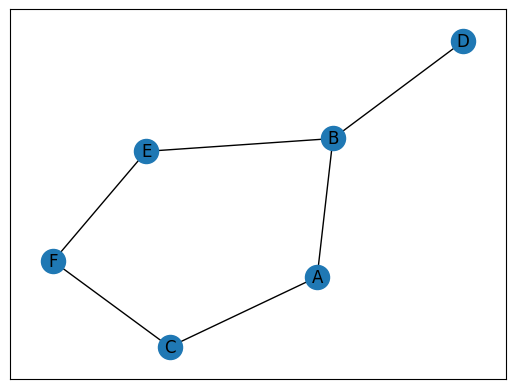

In [11]:
graph_dict = {'A': [1, 2],
              'B': [3, 4],
              'C': [5],
              'D': [],
              'E': [5],
              'F': []
              }

graph = Traversal()
graph.create_graph(graph_dict)
graph.print_graph()
graph.visualize()

In [4]:
dfs_result = graph.dfs()
bfs_result = graph.bfs()
all_paths = graph.all_paths(graph.nodes[0], graph.nodes[3])
shortest_path = graph.shortest_path(graph.nodes[0], graph.nodes[3])

print("\nDFS")
for i in range(len(dfs_result)):
    print(dfs_result[i].val, end=' ')
    
print("\nBFS")
for i in range(len(bfs_result)):
    print(bfs_result[i].val, end=' ')

print("\nAll Paths")
for path in all_paths:
    for node in path:
        print(node.val, end=' ')
    print()

print("Shortest Path")
for node in shortest_path:
    print(node.val, end=' ')

NameError: name 'graph' is not defined

In [4]:
graph_dict2 = {'A': [1, 2],
               'B': [3, 4],
               'C': [5],
               'D': [11],
               'E': [5],
               'F': [6, 10],
               'G': [8],
               'H': [10],
               'I': [12],
               'J': [7],
               'K': [9],
               'L': [1],
               'M': [2]
               }

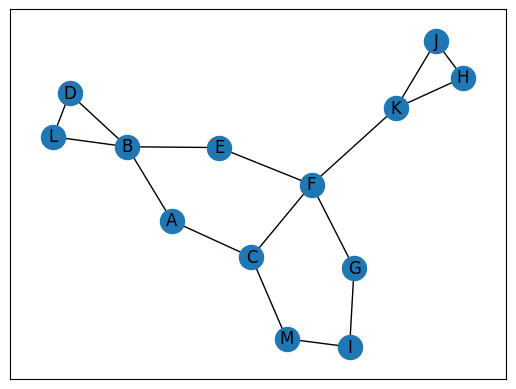

In [5]:
graph2 = Traversal()
graph2.create_graph(graph_dict2)
# graph2.print_graph()
graph2.visualize()

In [6]:
dfs_result = graph2.dfs()
bfs_result = graph2.bfs()
all_paths = graph2.all_paths(graph2.nodes[0], graph2.nodes[3])
shortest_path = graph2.shortest_path(graph2.nodes[0], graph2.nodes[3])

print("\nDFS")
for i in range(len(dfs_result)):
    print(dfs_result[i].val, end=' ')
    
print("\nBFS")
for i in range(len(bfs_result)):
    print(bfs_result[i].val, end=' ')

print("\nAll Paths")
for path in all_paths:
    for node in path:
        print(node.val, end=' ')
    print()

print("Shortest Path")
for node in shortest_path:
    print(node.val, end=' ')


DFS
A C M I G F K J H E B L D 
BFS
A B C D E L F M G K I H J 
All Paths
A B D 
A B L D 
A C F E B D 
A C F E B L D 
A C M I G F E B D 
A C M I G F E B L D 
Shortest Path
A B D 

In [ ]:
import time 

start=time.time()

# functioncall here

end = time.time()
